In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = np.array([[-1, 1]])

In [3]:
varied_param = 'num_agents'
varied_param_legend_label = 'Number of Agents'
varied_param_x_label = 'Number of Agents'

In [4]:
num_influencers = 1
num_agents = [10, 25, 50, 75, 100]
varied_param_values = num_agents

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 0.5, 2),
    consumer_attention_bound=30,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=60,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=False,
    delay_sensitivity=None,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing influencer 10
Optimizing producer 0
Optimization succeeded (overall 0.006962875137105584s): nit=6, nfev=16, njev=8.
Optimizing producer 1
Optimization succeeded (overall 0.0052847908809781075s): nit=5, nfev=14, njev=7.
Optimizing producer 2
Optimization succeeded (overall 0.004388042027130723s): nit=4, nfev=12, njev=6.
Optimizing producer 3
Optimization succeeded (overall 0.004172584041953087s): nit=4, nfev=12, njev=6.
Optimizing producer 4
Optimization succeeded (overall 0.003913874970749021s): nit=3, nfev=10, njev=5.
Optimizing producer 5
Optimization succeeded (overall 0.0040510420221835375s): nit=3, nfev=10, njev=5.
Optimizing producer 6
Optimization succeeded (overall 0.004649708047509193s): nit=4, nfev=12, njev=6.
Optimizing producer 7
Optimization succ

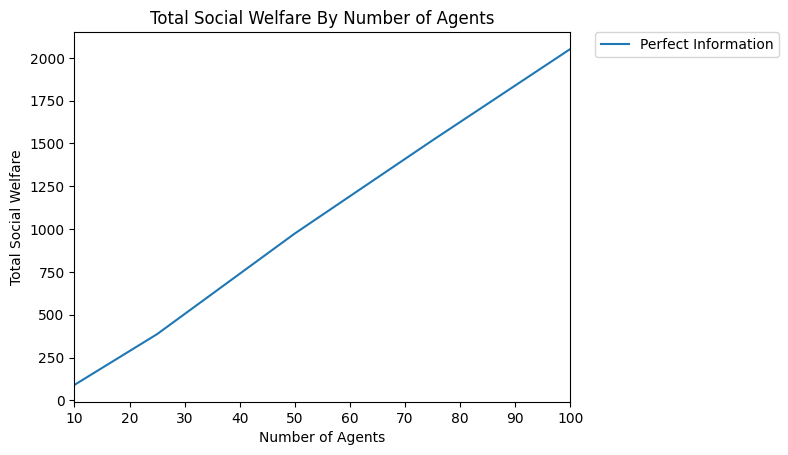

In [6]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

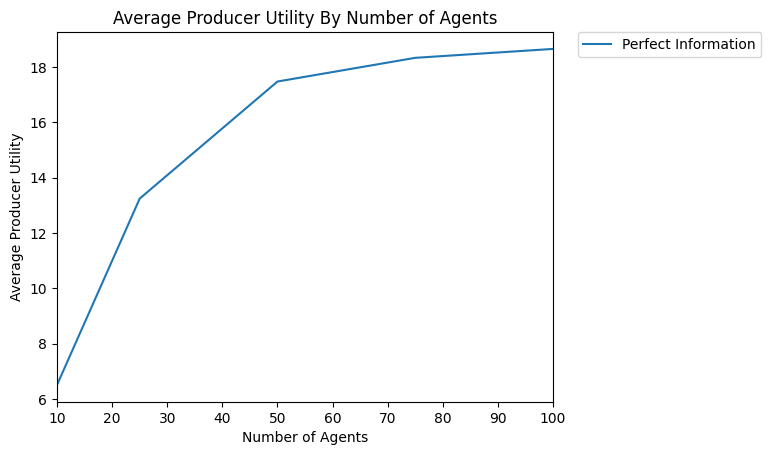

In [7]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

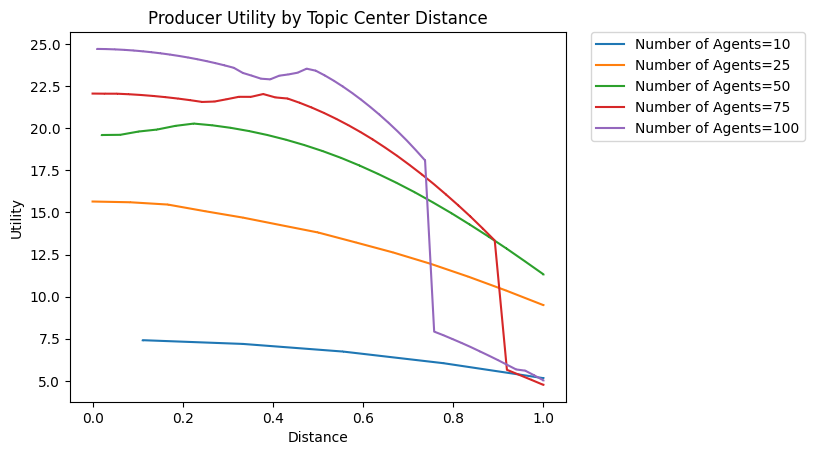

In [8]:
plt.figure()
plt.title('Producer Utility by Topic Center Distance')

for val, stats in zip(varied_param_values, perfect_info_stats):
    topics_bounds = stats.producer_stats[0].market.topics_bounds
    topic_center = np.mean(topics_bounds, axis=1)
    distances = []
    utilities = []
    for producer_stat in sorted(stats.producer_stats.values(), key=lambda x: np.linalg.norm(x.agent.main_interest - topic_center)):
        producer = producer_stat.agent
        main_interest = producer.main_interest
        distance = np.linalg.norm(main_interest - topic_center)
        distances.append(distance)
        utilities.append(stats.producer_stats[producer.index].utilities[-1])
    plt.plot(distances, utilities, label=f'{varied_param_legend_label}={val}')
plt.xlabel('Distance')
plt.ylabel('Utility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

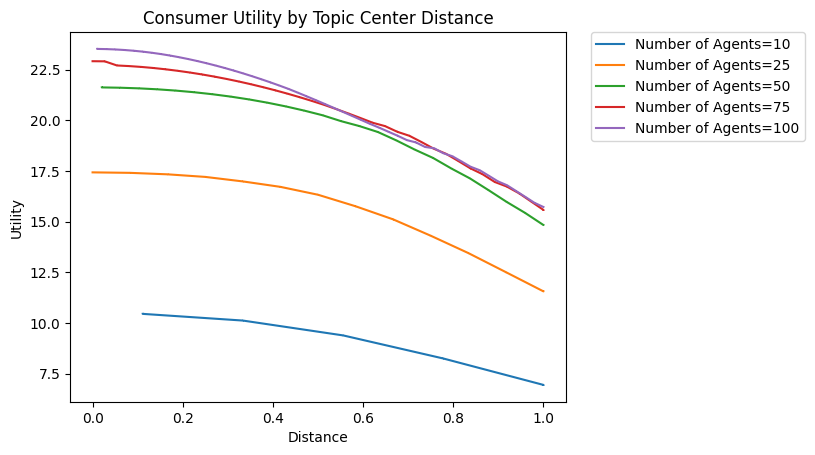

In [9]:
plt.figure()
plt.title('Consumer Utility by Topic Center Distance')

for val, stats in zip(varied_param_values, perfect_info_stats):
    topics_bounds = stats.consumer_stats[0].market.topics_bounds
    topic_center = np.mean(topics_bounds, axis=1)
    distances = []
    utilities = []
    for consumer_stat in sorted(stats.consumer_stats.values(), key=lambda x: np.linalg.norm(x.agent.main_interest - topic_center)):
        consumer = consumer_stat.agent
        main_interest = consumer.main_interest
        distance = np.linalg.norm(main_interest - topic_center)
        distances.append(distance)
        utilities.append(stats.consumer_stats[consumer.index].utilities[-1])
    plt.plot(distances, utilities, label=f'{varied_param_legend_label}={val}')
plt.xlabel('Distance')
plt.ylabel('Utility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

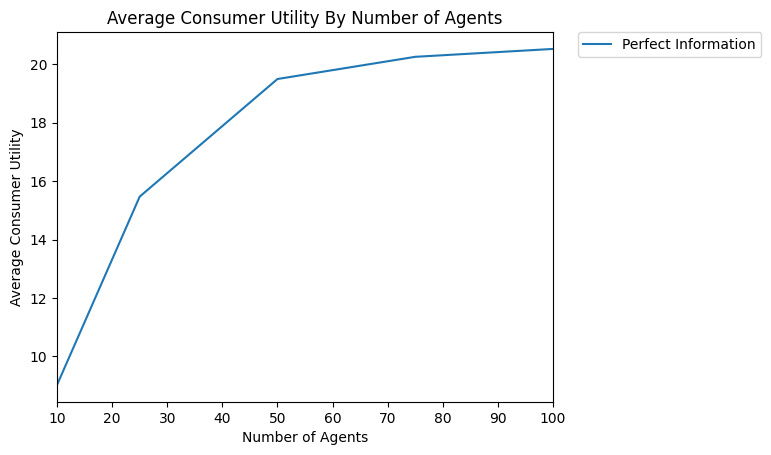

In [10]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

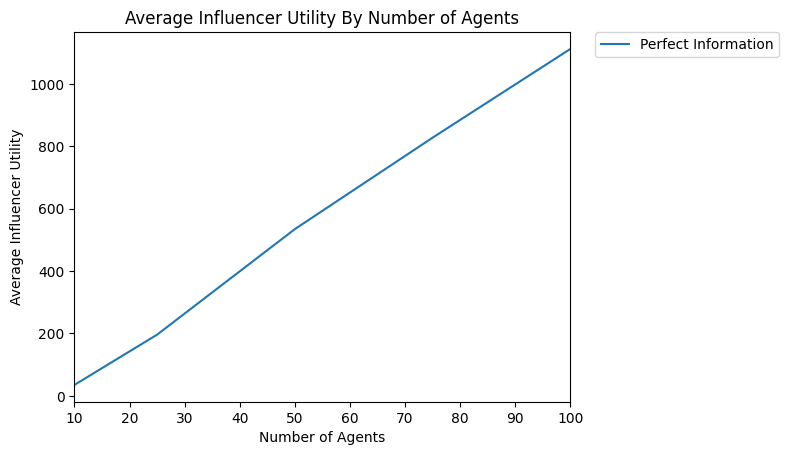

In [11]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

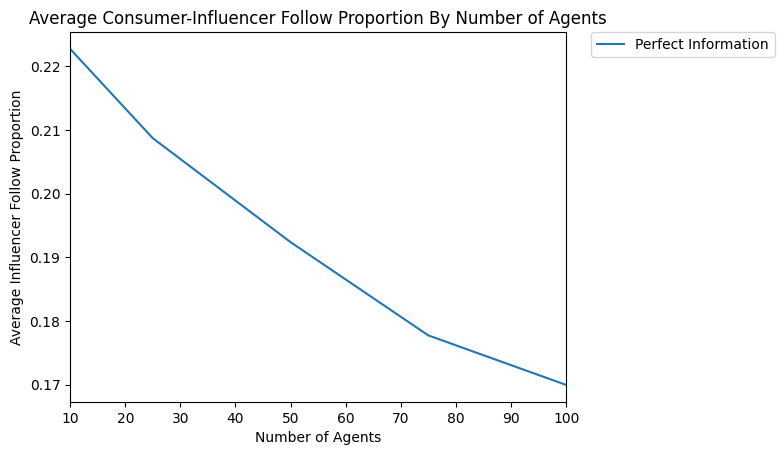

In [12]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

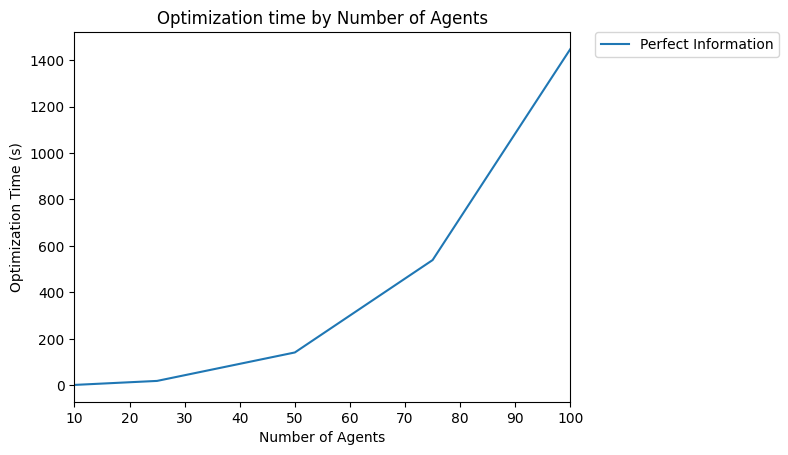

In [13]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

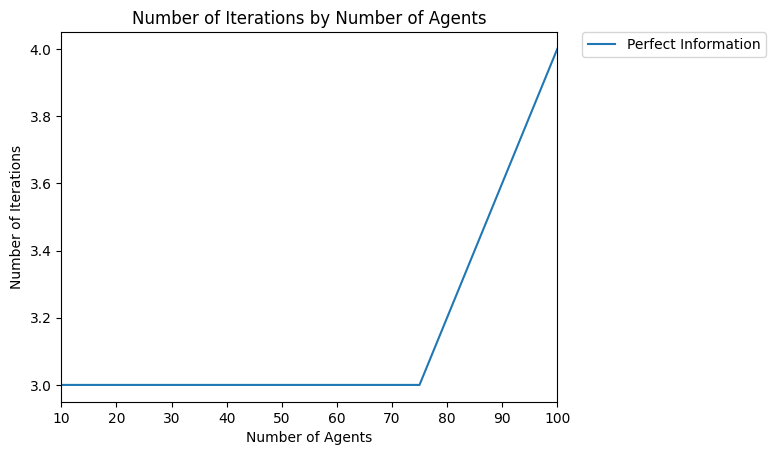

In [14]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

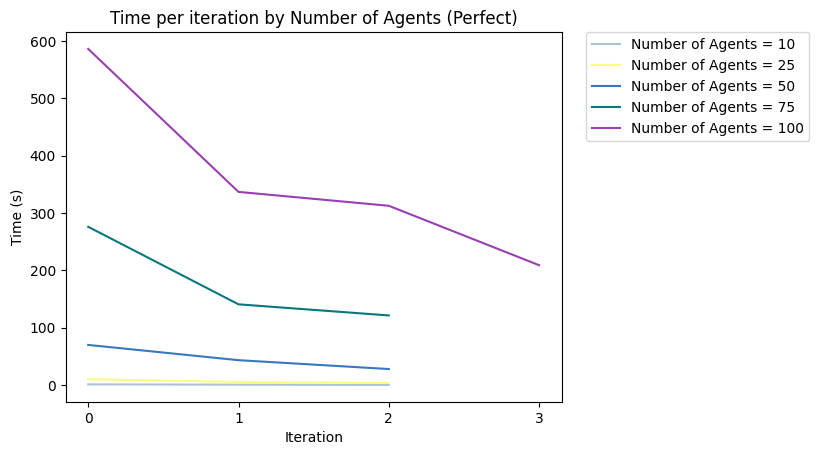

In [15]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

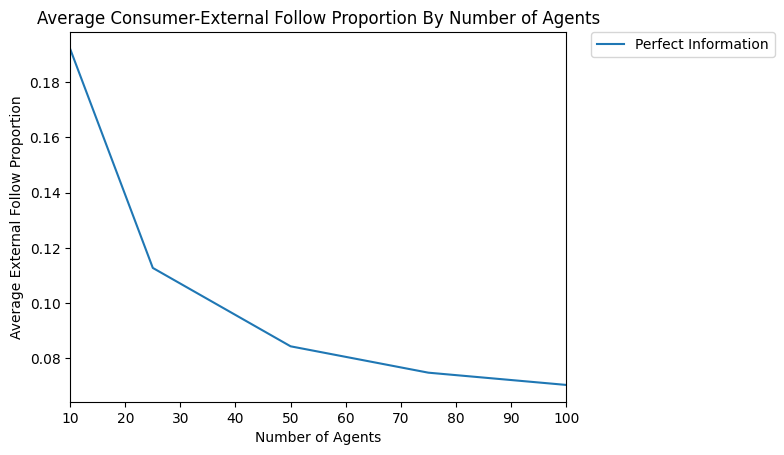

In [16]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

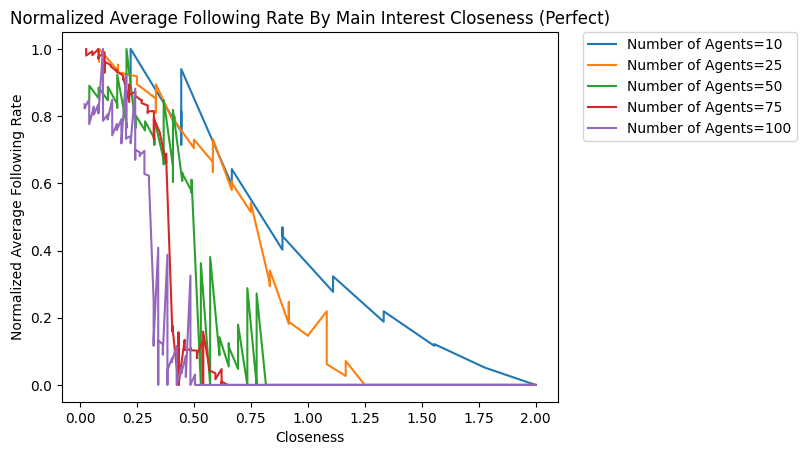

In [17]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    if min_rate == max_rate:
        continue
    rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}")
plt.title(f"Normalized Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Normalized Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [18]:
# for i in range(num_agents):
    #visualize.plot_agent_following_rates_by_test(8, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

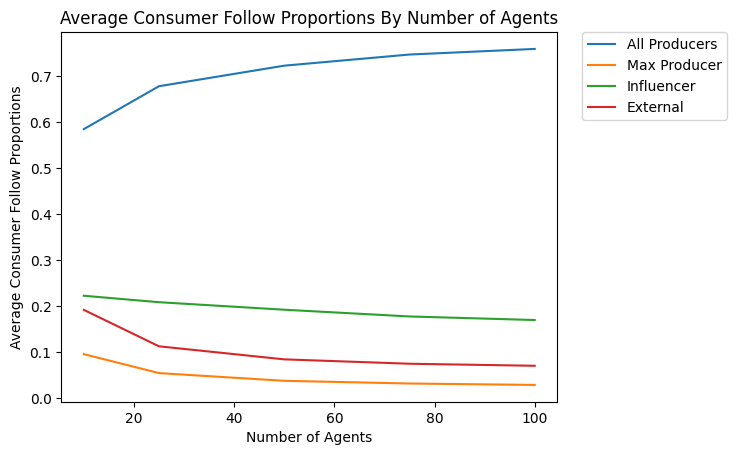

In [19]:
plt.figure()
plt.title(f'Average Consumer Follow Proportions By {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Average Consumer Follow Proportions')
avg_producer_proportions = []
avg_max_producer_proportions = []
avg_influencer_proportions = []
avg_external_proportions = []
for i in range(len(varied_param_values)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_producer_proportion = 0
    avg_max_producer_proportion = 0
    avg_influencer_proportion = 0
    avg_external_proportion = 0
    for consumer in perfect_stat.consumer_stats.values():
        avg_producer_proportion += sum(consumer.following_rates[-1][:-2]) / consumer.agent.attention_bound
        avg_max_producer_proportion += np.max(consumer.following_rates[-1][:-2]) / consumer.agent.attention_bound
        avg_influencer_proportion += consumer.following_rates[-1][-2] / consumer.agent.attention_bound
        avg_external_proportion += consumer.following_rates[-1][-1] / consumer.agent.attention_bound
    avg_producer_proportion /= len(perfect_stat.consumer_stats)
    avg_max_producer_proportion /= len(perfect_stat.consumer_stats)
    avg_influencer_proportion /= len(perfect_stat.consumer_stats)
    avg_external_proportion /= len(perfect_stat.consumer_stats)

    avg_producer_proportions.append(avg_producer_proportion)
    avg_max_producer_proportions.append(avg_max_producer_proportion)
    avg_influencer_proportions.append(avg_influencer_proportion)
    avg_external_proportions.append(avg_external_proportion)
plt.plot(varied_param_values, avg_producer_proportions, label='All Producers')
plt.plot(varied_param_values, avg_max_producer_proportions, label='Max Producer')
plt.plot(varied_param_values, avg_influencer_proportions, label='Influencer')
plt.plot(varied_param_values, avg_external_proportions, label='External')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

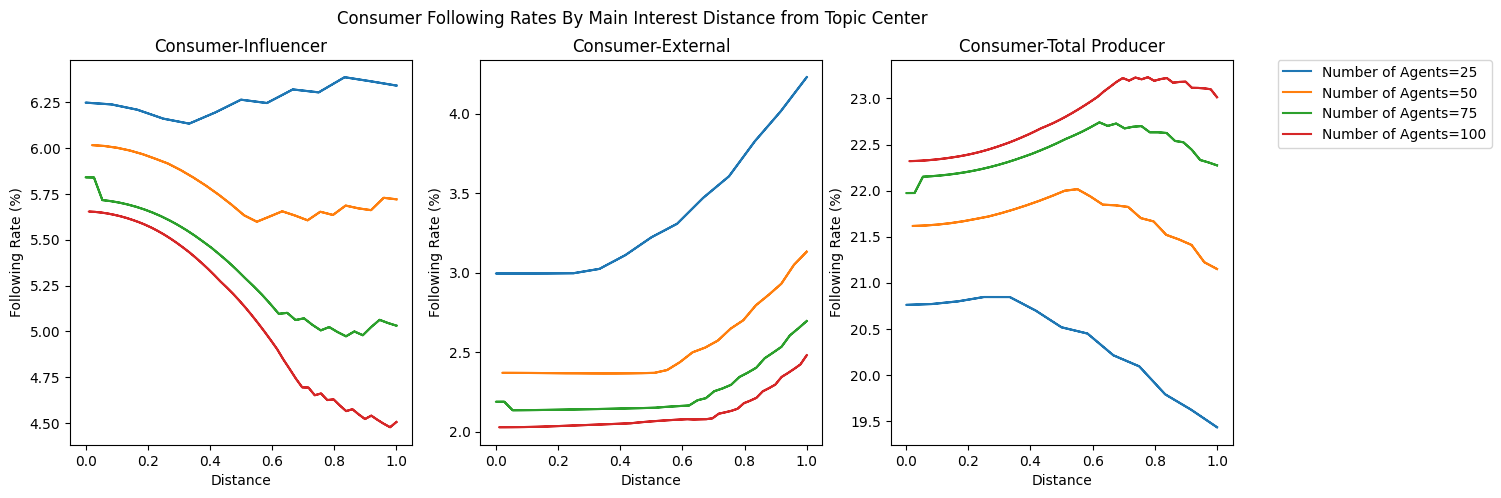

In [20]:
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle(f'Consumer Following Rates By Main Interest Distance from Topic Center')

ax1.set_title('Consumer-Influencer')
for i, stat in enumerate(perfect_info_stats):
    if i == 0:
        continue
    topic_center = [(stat.market.topics_bounds[i][0] + stat.market.topics_bounds[i][1]) / 2 for i in range(len(stat.market.topics_bounds))]
    distances = []
    influencer_rates = []
    for consumer in stat.market.consumers:
        main_interest = consumer.main_interest
        distance = np.linalg.norm(main_interest - topic_center)
        distances.append(distance)
        influencer_rates.append(stat.consumer_stats[consumer.index].following_rates[-1][stat.market.influencers[0].index])
    ax1.plot(distances, influencer_rates, label=f'{varied_param_legend_label}={varied_param_values[i]}')
ax1.set_xlabel('Distance')
ax1.set_ylabel('Following Rate (%)')

ax2.set_title('Consumer-External')
for i, stat in enumerate(perfect_info_stats):
    if i == 0:
        continue
    topic_center = [(stat.market.topics_bounds[i][0] + stat.market.topics_bounds[i][1]) / 2 for i in range(len(stat.market.topics_bounds))]
    distances = []
    external_rates = []
    for consumer in stat.market.consumers:
        main_interest = consumer.main_interest
        distance = np.linalg.norm(main_interest - topic_center)
        distances.append(distance)
        external_rates.append(stat.consumer_stats[consumer.index].following_rates[-1][-1])
    ax2.plot(distances, external_rates, label=f'{varied_param_legend_label}={varied_param_values[i]}')
ax2.set_xlabel('Distance')
ax2.set_ylabel('Following Rate (%)')

ax3.set_title('Consumer-Total Producer')
for i, stat in enumerate(perfect_info_stats):
    if i == 0:
        continue
    topic_center = [(stat.market.topics_bounds[i][0] + stat.market.topics_bounds[i][1]) / 2 for i in range(len(stat.market.topics_bounds))]
    distances = []
    total_producer_rates = []
    for consumer in stat.market.consumers:
        main_interest = consumer.main_interest
        distance = np.linalg.norm(main_interest - topic_center)
        #distance = main_interest[0] - topic_center[0]
        distances.append(distance)
        total_producer_rates.append(sum(stat.consumer_stats[consumer.index].following_rates[-1][:-2]))
    ax3.plot(distances, total_producer_rates, label=f'{varied_param_legend_label}={varied_param_values[i]}')
ax3.set_xlabel('Distance')
ax3.set_ylabel('Following Rate (%)')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.93, 0.88), loc='upper left', borderaxespad=0.)
plt.show()

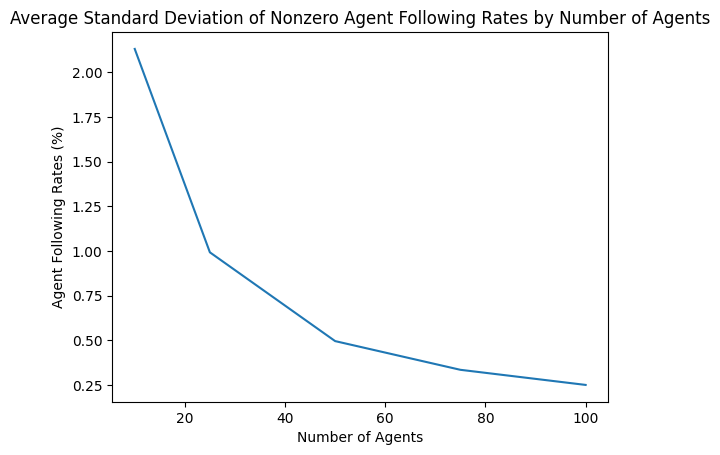

In [21]:
plt.figure()
plt.title(f'Average Standard Deviation of Nonzero Agent Following Rates by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Agent Following Rates (%)')
average_standard_deviations = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_standard_deviation = 0
    for index in perfect_stat.consumer_stats:
        stat = perfect_stat.consumer_stats[index]
        following_rate = [x / stat.agent.attention_bound * 100 for x in stat.following_rates[-1][:-2] if x > 1e-3]
        if len(following_rate) == 0:
            continue
        avg_standard_deviation += np.std(following_rate)
    average_standard_deviations.append(avg_standard_deviation / len(perfect_stat.consumer_stats))
plt.plot(varied_param_values, average_standard_deviations)
plt.show()

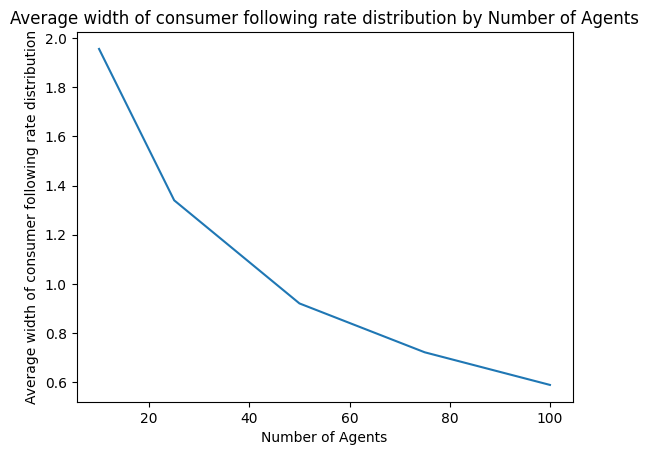

In [22]:
plt.figure()
plt.title(f'Average width of consumer following rate distribution by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Average width of consumer following rate distribution')
average_widths = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_width = 0
    for index in perfect_stat.consumer_stats:
        stat = perfect_stat.consumer_stats[index]
        following_rate = [x for x in stat.following_rates[-1][:-2]]
        min_nonzero_index = 0
        max_nonzero_index = len(following_rate) - 1
        while following_rate[min_nonzero_index] < 1e-3 and min_nonzero_index < len(following_rate) - 1:
            min_nonzero_index += 1
        while following_rate[max_nonzero_index] < 1e-3 and max_nonzero_index > 0:
            max_nonzero_index -= 1
        if min_nonzero_index > max_nonzero_index:
            continue
        avg_width += np.linalg.norm(perfect_stat.producer_stats[max_nonzero_index].agent.main_interest - perfect_stat.producer_stats[min_nonzero_index].agent.main_interest)
    average_widths.append(avg_width / len(perfect_stat.consumer_stats))
plt.plot(varied_param_values, average_widths)
plt.show()

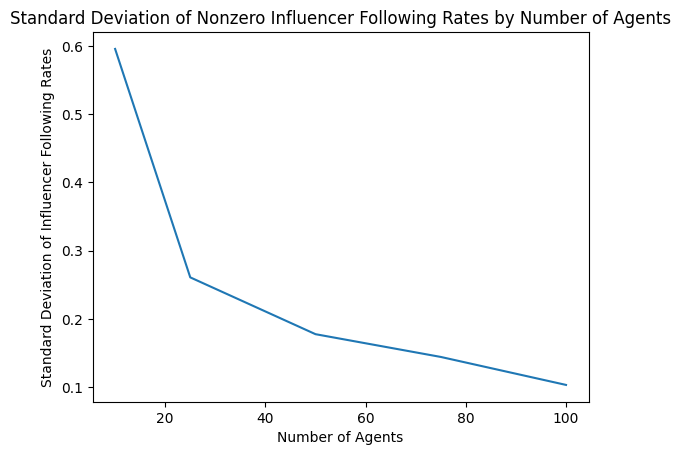

In [23]:
plt.figure()
plt.title(f'Standard Deviation of Nonzero Influencer Following Rates by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Standard Deviation of Influencer Following Rates')
standard_deviations = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    influencer_stat = [x for x in perfect_stat.influencer_stats.values()][0]
    following_rate = [x / influencer_stat.agent.attention_bound * 100 for x in influencer_stat.following_rates[-1][:-2] if x > 1e-3]
    standard_deviations.append(np.std(following_rate))
plt.plot(varied_param_values, standard_deviations)
plt.show()

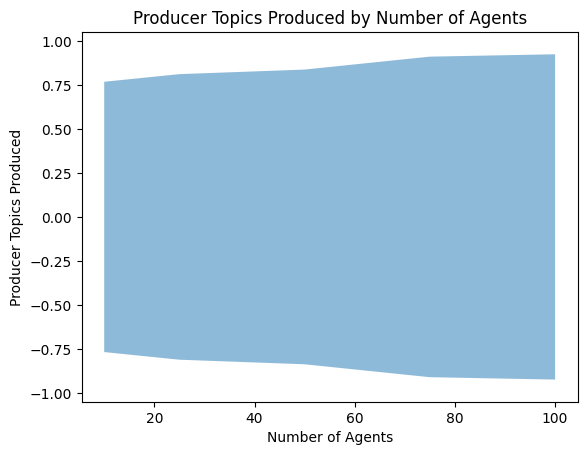

In [30]:
plt.figure()
plt.title(f'Producer Topics Produced by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Ending Topics Produced')
plt.ylim(-1.05, 1.05)
min_topics = []
max_topics = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    topics_produced = []
    for producer_stat in perfect_stat.producer_stats.values():
        topics_produced.append(producer_stat.topics[-1])

    min_topic = np.min(topics_produced)
    max_topic = np.max(topics_produced)

    min_topics.append(min_topic)
    max_topics.append(max_topic)
plt.fill_between(varied_param_values, min_topics, max_topics, alpha=0.5)
plt.show()

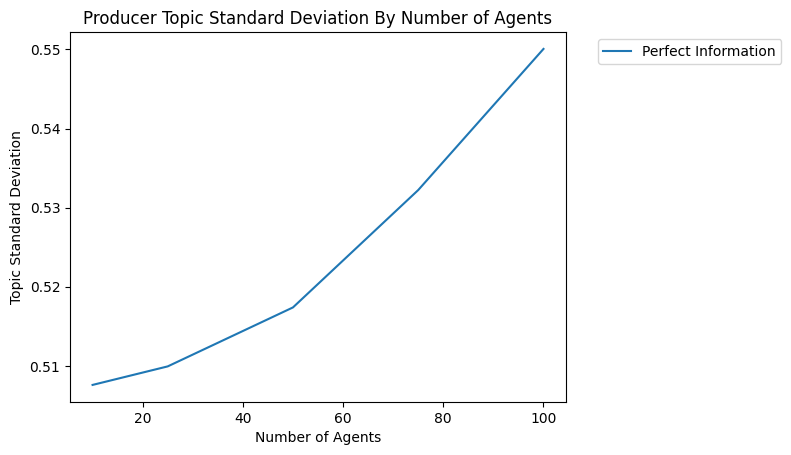

In [24]:
plt.figure()
std_deviations = [stat.producer_topic_standard_deviation[-1] for stat in perfect_info_stats]
plt.plot(varied_param_values, std_deviations, label='Perfect Information')
plt.title(f'Producer Topic Standard Deviation By {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Topic Standard Deviation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

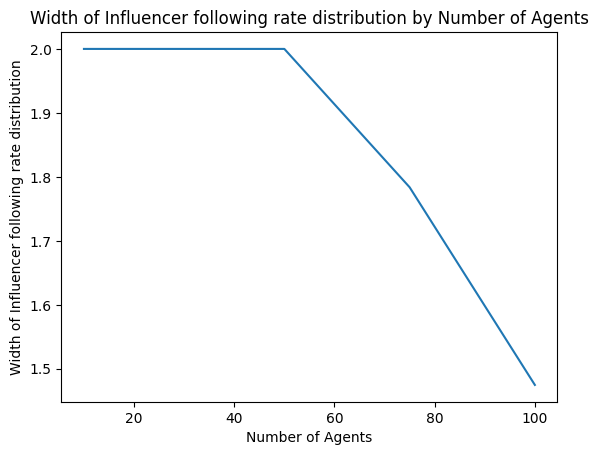

In [25]:
plt.figure()
plt.title(f'Width of Influencer following rate distribution by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Width of Influencer following rate distribution')
widths = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    width = 0
    stat = [x for x in perfect_stat.influencer_stats.values()][0]
    following_rate = [x for x in stat.following_rates[-1][:-2]]
    min_nonzero_index = 0
    max_nonzero_index = len(following_rate) - 1
    while following_rate[min_nonzero_index] < 1e-3 and min_nonzero_index < len(following_rate) - 1:
        min_nonzero_index += 1
    while following_rate[max_nonzero_index] < 1e-3 and max_nonzero_index > 0:
        max_nonzero_index -= 1
    if min_nonzero_index > max_nonzero_index:
            continue
    width = np.linalg.norm(perfect_stat.producer_stats[max_nonzero_index].agent.main_interest - perfect_stat.producer_stats[min_nonzero_index].agent.main_interest)
    widths.append(width)
plt.plot(varied_param_values, widths)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


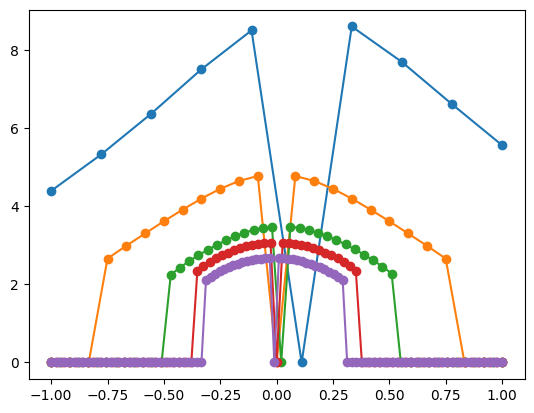

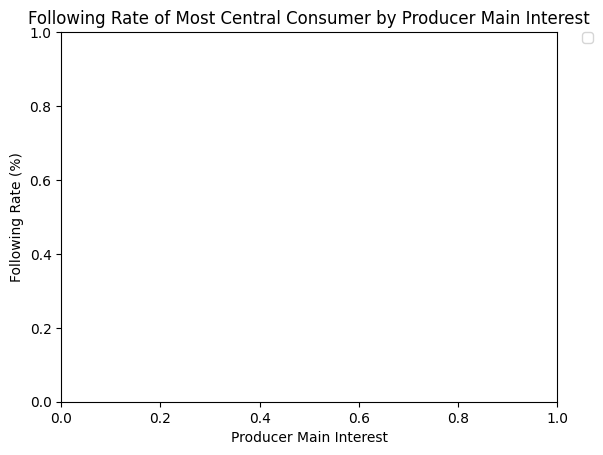

In [26]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    topic_center = [(stat.market.topics_bounds[i][0] + stat.market.topics_bounds[i][1]) / 2 for i in range(len(stat.market.topics_bounds))]
    most_central_consumer = list(sorted(stat.consumer_stats.values(), key=lambda x: np.linalg.norm(x.agent.main_interest - topic_center)))[0]
    following_rates = most_central_consumer.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / most_central_consumer.agent.attention_bound * 100) for prod in stat.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.figure()
plt.title('Following Rate of Most Central Consumer by Producer Main Interest')
plt.xlabel('Producer Main Interest')
plt.ylabel('Following Rate (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

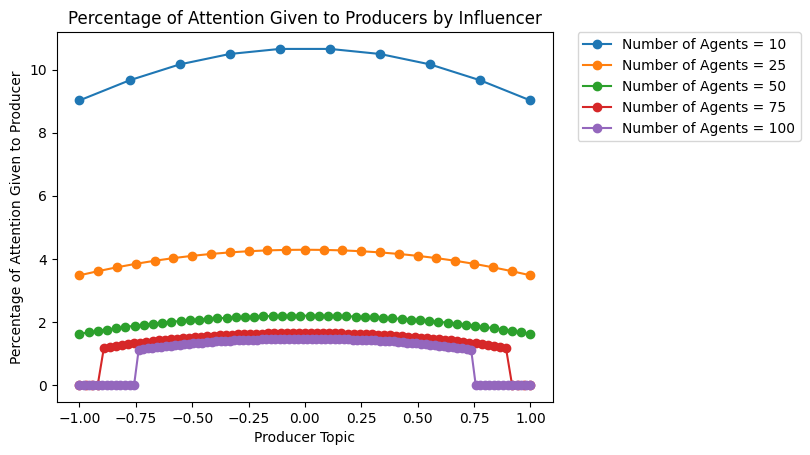

In [27]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = val
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

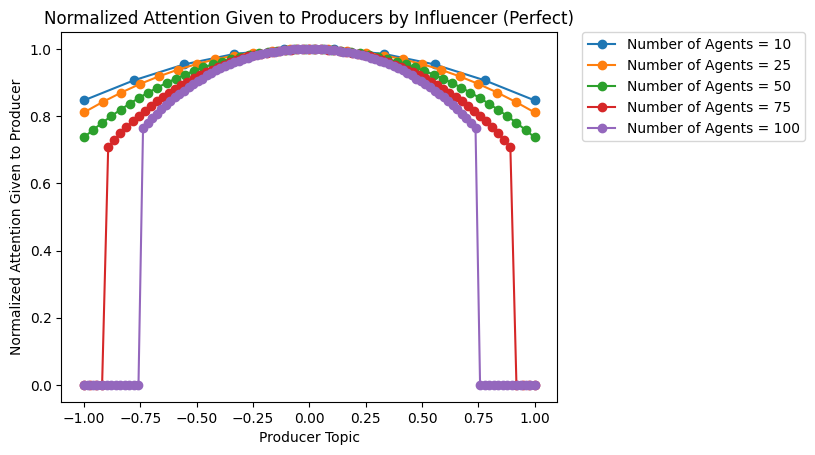

In [28]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = val
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()